In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
start = '2013-01-01'
end = '2023-12-21'
coin = 'BTC-USD'

data = yf.download(coin, start, end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
data.reset_index(inplace=True)

In [10]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3377,2023-12-16,41937.742188,42664.945312,41723.113281,42240.117188,42240.117188,14386729590
3378,2023-12-17,42236.109375,42359.496094,41274.542969,41364.664062,41364.664062,16678702876
3379,2023-12-18,41348.203125,42720.296875,40530.257812,42623.539062,42623.539062,25224642008
3380,2023-12-19,42641.511719,43354.296875,41826.335938,42270.527344,42270.527344,23171001281


In [11]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

In [12]:
data

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014
...,...
3377,42240.117188
3378,41364.664062
3379,42623.539062
3380,42270.527344


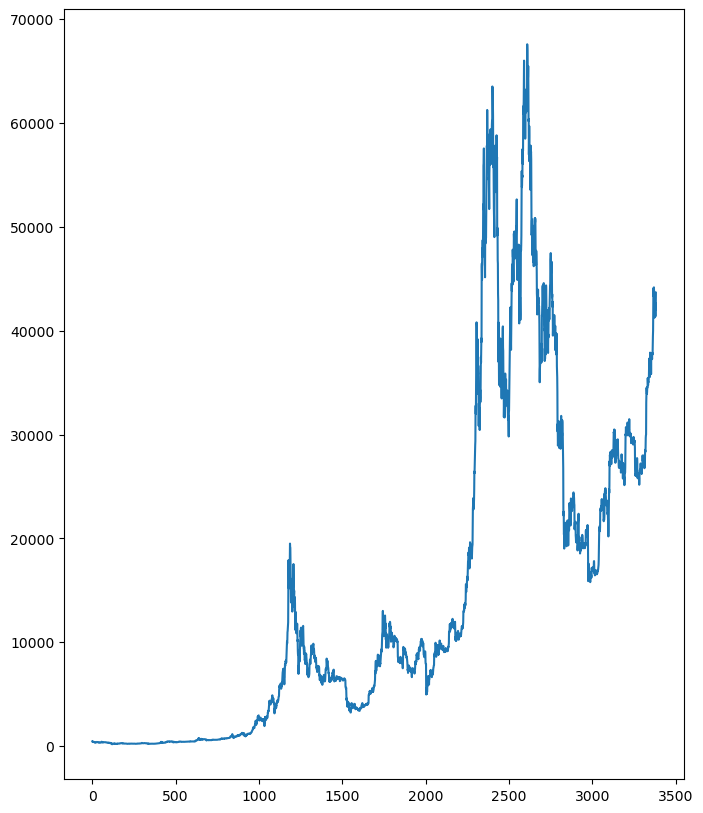

In [13]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [14]:
train_data = data[:-100]
test_data = data[-100:]

In [15]:
train_data.shape

(3282, 1)

In [16]:
test_data.shape

(100, 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
train_data_scale = scaler.fit_transform(train_data)

In [19]:
base_days = 100

In [21]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [22]:
x, y = np.array(x), np.array(y)

In [23]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [25]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [30]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [31]:
model.fit(x, y, epochs = 100, verbose =1 )

Epoch 1/100

100/100 [==============================] - 18s 141ms/step - loss: 0.0164
Epoch 2/100
100/100 [==============================] - 14s 141ms/step - loss: 0.0051
Epoch 3/100
100/100 [==============================] - 14s 140ms/step - loss: 0.0045
Epoch 4/100
100/100 [==============================] - 14s 141ms/step - loss: 0.0042
Epoch 5/100
100/100 [==============================] - 14s 141ms/step - loss: 0.0047
Epoch 6/100
100/100 [==============================] - 14s 140ms/step - loss: 0.0036
Epoch 7/100
100/100 [==============================] - 14s 142ms/step - loss: 0.0040
Epoch 8/100
100/100 [==============================] - 14s 142ms/step - loss: 0.0039
Epoch 9/100
100/100 [==============================] - 14s 142ms/step - loss: 0.0035
Epoch 10/100
100/100 [==============================] - 15s 145ms/step - loss: 0.0033
Epoch 11/100
100/100 [==============================] - 14s 143ms/step - loss: 0.0037
Epoch 12/100
100/100 [==============================] - 14s 14

In [32]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [33]:
test_data

,Close
0,27119.066406
1,25760.097656
2,27238.783203
3,26345.998047
4,26508.216797
...,...
195,42240.117188
196,41364.664062
197,42623.539062
198,42270.527344


In [34]:
test_data_scale = scaler.transform(test_data)

In [36]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [37]:
x, y = np.array(x), np.array(y)

In [38]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [39]:
pred = model.predict(x)

4/4 [==============================] - 1s 46ms/step


In [40]:
pred = scaler.inverse_transform(pred)

In [41]:
pred

array([[24195.684],
       [24001.236],
       [24025.621],
       [24309.07 ],
       [24726.697],
       [25063.865],
       [25200.273],
       [25214.068],
       [25290.377],
       [25438.123],
       [25464.785],
       [25348.262],
       [25174.023],
       [24970.012],
       [24797.658],
       [24683.582],
       [24659.875],
       [24837.918],
       [25140.447],
       [25421.445],
       [25819.46 ],
       [26161.938],
       [26283.49 ],
       [26303.05 ],
       [26218.855],
       [26210.271],
       [26324.184],
       [26490.227],
       [26537.258],
       [26396.318],
       [26067.887],
       [25666.7  ],
       [25358.727],
       [25224.773],
       [25298.7  ],
       [25806.113],
       [26589.377],
       [27154.455],
       [27422.709],
       [27716.777],
       [28140.14 ],
       [28547.854],
       [29685.1  ],
       [31468.262],
       [33263.098],
       [34076.953],
       [33863.85 ],
       [33248.176],
       [32873.027],
       [32909.914],


In [42]:
#future Bitcoin Price

In [43]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 [==============================] - 0s 37ms/step


In [44]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [45]:
z

array([[41818.63349553],
       [41986.29377811],
       [41575.16237531],
       [40887.57486773],
       [40144.1394272 ],
       [39433.07040235],
       [38769.86414858],
       [38145.68798431],
       [37555.30014081],
       [36996.95336182],
       [36472.8407552 ],
       [35985.60931373],
       [35530.02128537],
       [35094.25557785],
       [34665.18969428],
       [34232.0830296 ],
       [33785.48835004],
       [33320.27233726],
       [32835.20990354],
       [32328.05170752],
       [31803.20806495],
       [31267.65193409],
       [30727.63327062],
       [30191.12116968],
       [29664.97210578],
       [29143.88807665],
       [28618.48611542],
       [28082.18689857],
       [27528.78666227],
       [26951.17788944]])

In [46]:
model.save('Bitcoin_Price_prediction_Model.h5')

c:\Users\833_SOURIN\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
